# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# %matplotlib notebook

In [56]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)

(27028, 69)


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

No codigo abaixo, fiz com que os números do APGAR5 fossem transformados em categorias, como “asfixia grave”, “asfixia moderada”, “asfixia leve” e “normal”. Assim, cada bebê fica classificado de acordo com sua pontuação de forma mais clara e legível.

In [57]:
# Definição dos intervalos e categorias
bins = [-1, 3, 5, 7, 10]  
labels = ["asfixia grave", "asfixia moderada", "asfixia leve", "normal"]

# Sobrescrevendo como string
sinasc["APGAR5"] = pd.cut(sinasc["APGAR5"], bins=bins, labels=labels).astype(str)

In [58]:
sinasc['APGAR5'].value_counts()

APGAR5
normal              26463
asfixia leve          320
nan                   103
asfixia grave          74
asfixia moderada       68
Name: count, dtype: int64

In [59]:
sinasc = sinasc[sinasc["APGAR5"] != "nan"]
sinasc['APGAR5'].value_counts()

APGAR5
normal              26463
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

Aqui fiz um gráfico para mostrar como os bebês se distribuem em cada categoria de **APGAR5**, separando por sexo. Primeiro, eu tirei os dados que estavam faltando em **APGAR5**, **SEXO** ou **GESTACAO**, e depois usei um gráfico de contagem para comparar quantos meninos e meninas têm cada pontuação de APGAR5.

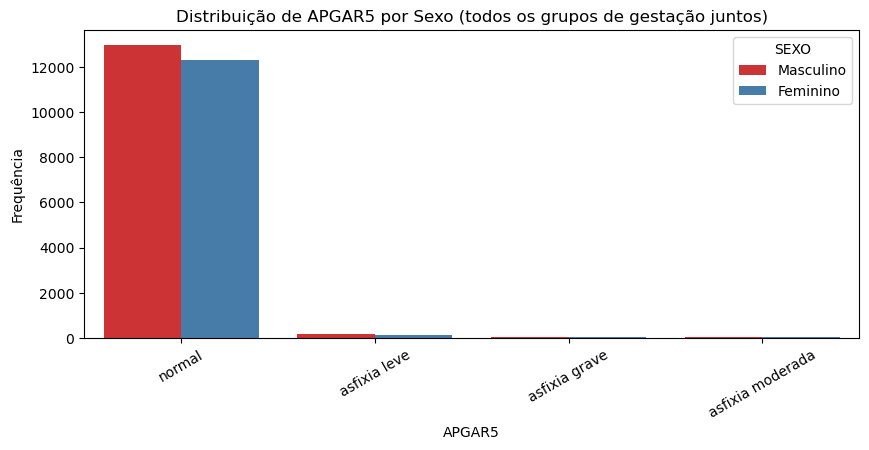

In [60]:
# Remove linhas com NaN nas colunas relevantes 
sinasc_plot = sinasc.dropna(subset=["APGAR5", "SEXO", "GESTACAO"])

# Remove linhas com NaN nas colunas relevantes
plt.figure(figsize=(10,4))
sns.countplot(
    data=sinasc_plot,
    x="APGAR5", hue="SEXO", palette="Set1"
)
plt.title("Distribuição de APGAR5 por Sexo (todos os grupos de gestação juntos)")
plt.ylabel("Frequência")
plt.xticks(rotation=30)
plt.show()

O grafico acima mostra a distribuição por **SEXO** em cada categoria de **APGAR5**. A maioria dos bebês está na categoria normal, com números bastante semelhantes entre meninos e meninas. Nas categorias de asfixia leve, moderada e grave, os números são muito menores, mas ainda assim os meninos tendem a ter valores ligeiramente maiores que as meninas em asfixia leve e moderada, enquanto em asfixia grave há uma pequena predominância de meninas em relação aos meninos. Concluimos que o sexo do bebê não influencia o APGAR.

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

O código abaixo mostra quantos bebês há em cada combinação de **GESTACAO** e **APGAR5**, criando uma tabela que mostra a frequência de cada categoria de **APGAR5** dentro de cada grupo de semanas de gestação.

In [61]:
freq = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
freq

APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [62]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


As tabelas acima (contagem e porcentagem) mostram que a maioria dos bebês com 37 a 41 semanas tem **APGAR5** normal. Bebês prematuros (22 a 31 semanas) apresentam proporções maiores de asfixia grave ou leve, indicando maior risco. Grupos extremos têm poucos registros, mas seguem o mesmo padrão.

In [63]:
freq_pctlin.sum(axis = 1)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

Abaixo criei um gráfico de barras mostrando a distribuição das gestações por faixa de semanas. Cada barra tem uma cor diferente, os rótulos e títulos são ajustados para melhor leitura, e a legenda é posicionada no canto superior esquerdo.

<Figure size 800x500 with 0 Axes>

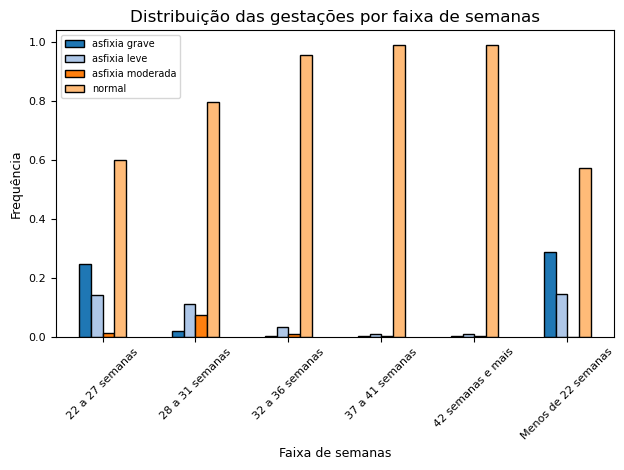

In [64]:
import matplotlib.pyplot as plt
from matplotlib import cm

plt.figure(figsize=(8,5))

ax = freq_pctlin.plot(
    kind="bar",
    color=list(cm.tab20.colors)[:len(freq_pctlin)],
    edgecolor="black",
    label="Frequência"
)

# fontes
ax.set_title("Distribuição das gestações por faixa de semanas", fontsize=12)
ax.set_xlabel("Faixa de semanas", fontsize=9)
ax.set_ylabel("Frequência", fontsize=9)

# ajustar tamanho e rotação dos ticks
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=8)
plt.setp(ax.get_yticklabels(), fontsize=8)

# Posição da legenda
ax.legend(loc="upper left", fontsize=7, frameon=True)

plt.tight_layout()
plt.show()

O grafico acima mostra que a maioria dos bebês com **APGAR5** normal está nas gestação de 37 a 41 semanas. Casos de asfixia grave, leve ou moderada são mais frequentes em bebês prematuros, especialmente entre 22 e 36 semanas. Bebês nas gestação muito precoces ou muito tardias têm poucos registros, mas seguem a mesma tendência.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

Abaixo crio um boxplot, mostrando a relação do peso dos bebês em cada categoria de **APGAR5**. Primeiro, garante que a coluna **PESO** é numérica e remove linhas com valores ausentes. Em seguida, trata **APGAR5** como categoria e plota o gráfico com cores diferentes para cada categoria, incluindo títulos, rótulos e grade para facilitar a leitura.

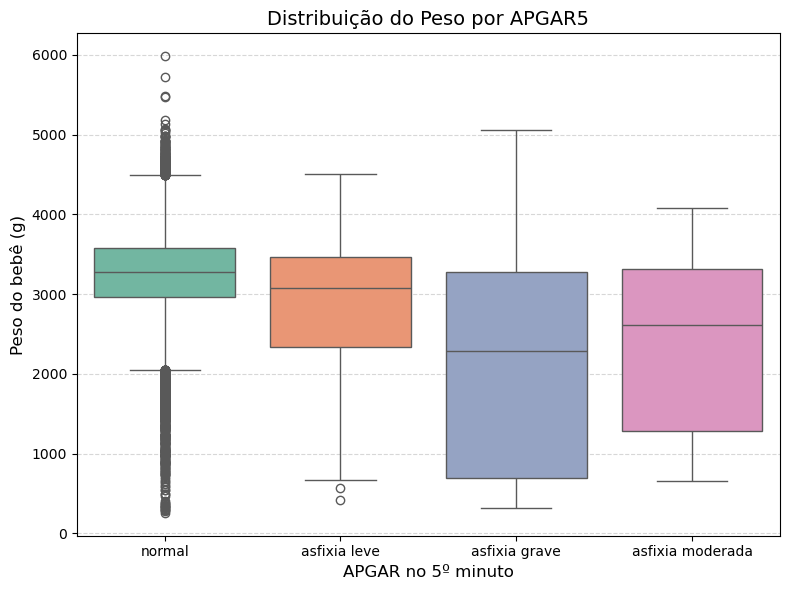

In [78]:
# Garantir que PESO é numérico
sinasc["PESO"] = pd.to_numeric(sinasc["PESO"], errors="coerce")

# Remover linhas com valores ausentes
sinasc_clean = sinasc.dropna(subset=["APGAR5", "PESO"]).copy()

# Garantir que APGAR5 é tratada como categoria
sinasc_clean["APGAR5"] = sinasc_clean["APGAR5"].astype(str)

# Boxplot com cores diferentes por categoria
plt.figure(figsize=(8,6))
sns.boxplot(x="APGAR5", y="PESO", data=sinasc_clean,
            hue="APGAR5", dodge=False, palette="Set2", legend=False)

# Ajustes visuais
plt.title("Distribuição do Peso por APGAR5", fontsize=14)
plt.xlabel("APGAR no 5º minuto", fontsize=12)
plt.ylabel("Peso do bebê (g)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

O boxplot acima mostra que bebês com **APGAR5** normal têm peso geralmente maior e mais concentrado, enquanto os bebês com asfixia grave apresentam grande variação de peso, incluindo valores muito baixos. As categorias de asfixia leve e moderada ficam entre esses extremos, com pesos médios mais próximos do normal, mas ainda mostrando dispersão. Além disso, há outliers especialmente na categoria normal, indicando alguns bebês com peso muito alto ou muito baixo.